# The Qmod Workshop -  Introduction

The Classiq platform features a high-level quantum modeling language called Qmod. Qmod is compiled into concrete gate-level implementation using a powerful synthesis engine that optimizes and adapts the implementation to different target hardware/simulation environments.

In this workshop, we will learn how to write quantum models using Qmod. We will be using the Python embedding of Qmod, available as part of the Classiq Python SDK. We will learn basic concepts in the Qmod language, such as functions, operators, quantum variables, and quantum types. 

The [Classiq webpage](https://docs.classiq.io/latest/) covers these concepts more systematically and includes more examples. For specific function you can use the [reference manual](https://docs.classiq.io/latest/qmod-reference) tab.

This workshop consists of step-by-step exercises. It is structured as 5 exercises: Language Fundamentals - Exercises 1-5.

For each exercise, find the solution at the bottom of the notebook.

### Preparations

Make sure you have a Python version of 3.9 through 3.12 installed.

Install Classiq’s Python SDK by following the instructions on this page: [Getting Started - Classiq](https://docs.classiq.io/latest/classiq_101/registration_installations).


### Designing a quantum program

The first step in quantum software development is designing your software and your algorithm. Classiq features a unique high-level modeling language called Qmod that naturally captures the core concepts of quantum algorithm design. There are two ways to design in Qmod:
* Directly, via the Classiq IDE using the Qmod native syntax
* With Classiq Python SDK package, that gives access to the Qmod language via Python

Once you finish designing your algorithm, you send it to the Classiq synthesis engine (compiler) to create a concrete quantum circuit implementation - a quantum program.

Through the following example, we will explain some basic Qmod principles.

## Example

Let's get started and understand Qmod through a concrete example.


Our task is to design a quantum algorithm that computes the arithmtic operation $y=x^2+1$ coherently for a quantum variable $|x\rangle$ that is a superposition of all the numbers between $0$ and $7$:
$\begin{equation}
|x\rangle = \frac{1}{\sqrt{8}}(|0\rangle+|1\rangle+\dots +|7\rangle.
\end{equation}$
The expected output is 

$\begin{equation}
|x\rangle |y\rangle = |x\rangle |x^2+1\rangle = \frac{1}{\sqrt{8}}\sum_{i=0}^{7}|i\rangle|i^2+1\rangle,
\end{equation}$
where $|x\rangle$ is entangled to $|y\rangle$.

Sounds complicated? The following code in Qmod with a few lines creates the desired algorithm with Classiq:

In [1]:
from classiq import *


@qfunc
def main(x: Output[QNum], y: Output[QNum]):

    allocate(4, x)
    hadamard_transform(x)  # creates a uniform superposition
    y |= x**2 + 1

The desired quantum program can be synthesized and viewed. Since this proccess is done on Classiq cloud, we will authenticate first.

In [2]:
authenticate()

Your user code: TLDT-DVJQ
If a browser doesn't automatically open, please visit this URL from any trusted device: https://auth.classiq.io/activate?user_code=TLDT-DVJQ


Synthesize the quantum program:

In [3]:
quantum_program = synthesize(create_model(main))

In [4]:
show(quantum_program)

Opening: https://platform.classiq.io/circuit/2sWerW9C2S5QuHwqdLj0xoUQq0j?version=0.66.1


## Executing

Execution process is also done through the Classiq cloud. We will execute the quantum program, save the job, and get the results.

In [5]:
job = execute(quantum_program)
job.open_in_ide()

In [6]:
results = job.result()
results[0].value.parsed_counts

[{'x': 0, 'y': 1}: 147,
 {'x': 4, 'y': 17}: 137,
 {'x': 13, 'y': 170}: 135,
 {'x': 12, 'y': 145}: 135,
 {'x': 2, 'y': 5}: 133,
 {'x': 15, 'y': 226}: 133,
 {'x': 10, 'y': 101}: 131,
 {'x': 14, 'y': 197}: 131,
 {'x': 1, 'y': 2}: 129,
 {'x': 11, 'y': 122}: 129,
 {'x': 3, 'y': 10}: 126,
 {'x': 6, 'y': 37}: 122,
 {'x': 7, 'y': 50}: 120,
 {'x': 8, 'y': 65}: 119,
 {'x': 5, 'y': 26}: 116,
 {'x': 9, 'y': 82}: 105]

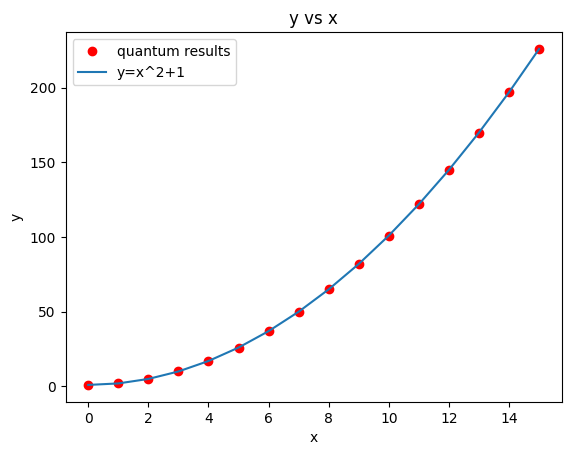

In [7]:
import matplotlib.pyplot as plt

x = [results[0].value.parsed_counts[i].state["x"] for i in range(len(results[0].value.parsed_counts))]
y = [results[0].value.parsed_counts[i].state["y"] for i in range(len(results[0].value.parsed_counts))]
plt.plot(x, y, 'ro', label='quantum results')
plt.plot(sorted(x), [i**2+1 for i in sorted(x)], label='y=x^2+1')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('y vs x')
plt.show()

## Key Qmod Principles

<u>**1) There must be a `qfunc` decorator in Python or keyword in the native syntax**</u>

We can see the `qfunc` decorator (`@qfunc`) in the Python implementation and the corresponding keyword in the native implementation. In Qmod, we are dealing with quantum functions that manipulate quantum objects.

<u>**2) There must be a `main` function**</u>

Every quantum algorithm written in Qmod must have a `main` function. From this `main` function, the quantum program is created using the `synthesize(create_model(main))` command in Python or just by pressing the Synthesis button in the IDE.

<u>**3) The arguments of the `main` function must be declared as `Output`s** (for non-variational circuits)</u>

In the above example, there are two arguments for the `main` function: `x` and `y`, both of which are [quantum variables](https://docs.classiq.io/latest/qmod-reference/language-reference/quantum-variables). The type of both them is `QNum`, which stands for a quantum number, a type of `quantum variable`. In addition to the type, the variables of the `main` function must be declared as `Output` which indicates these quantum variables are not initialized outside the scope of the function. The `Output`s are measured, unlike auxiliary qubits.
<details> 
<summary> Types of Quantum Variables </summary>
In Qmod, there are few types of quantum variables:

1. `QBit` (`qbit`)
2. `QArray[QBit]` (`qbit[]`) and `QArray[QNum]` (`qnum[]`)
3. `QNum[N,S,F]` (`qnum<N,S,F>`) - quantum number with N qubits, S for signed or unsigned, and F fraction bits
4. 'QStruct' (`qstruct`) - Struct of quantum variables
</details>


<u>**4) Every quantum variable needs to be declared before it is used**</u>

Here, we declare the variables `x` and `y` as arguments of the `main` function; but we could also declare variables in the scope of a function, see again [Quantum Variables](https://docs.classiq.io/latest/qmod-reference/language-reference/quantum-variables).
<details> 
<summary> Declaration within a Scope of a Function </summary>
You can declare a quantum variable within the scope of a function with 

`x = QNum('x')`

</details>

<u>**5) Every quantum variable needs to be initialized**</u>

After a quantum variable is declared, it needs to be initialized. There are several ways to initialize quantum variables, and in the above example, we can see two ways:

* `x` is initialized with the `allocate` operation.
* `y` i initialized with the `|=` numeric assignment.

<details> 
<summary> Types of Initializations </summary>
There are a few ways to initialize a quantum variable:

1. With `allocate` or `allocate_num`.
2. With `prepare_int`, `prepare_state` or `prepare_amplitudes`.
3. As the result of a numeric operation, like in the example above.
4. With the `bind` operation.
5. With any function that declares its quantum variable argument as `Output`.

</details>

### Python Qmod Exercises - General Instructions

Quantum functions manipulate quantum objects, which are represented using quantum variables. Every variable needs to be declared and initialized before it is used.

In order to synthesize and execute your Qmod code, you should:
1. Make sure you define a `main` function that calls functions you create.
2. Use `create_model` by running `qmod = create_model(main)` to construct a representation of your model.
3. You can synthesize the model (using `qprog = synthesize(qmod)`) to obtain an implementation - a quantum program.
4. You can then visualize the quantum program (`show(qprog)`) or execute it using `execute(qprog)`. See: [Execution - Classiq](https://github.com/Classiq/classiq-library/blob/main/tutorials/documentation_materials/classiq_101/classiq_concepts/execute/execute.ipynb). You can also execute it with the IDE after visualizing the circuit.

### Exercise 0: From Model to Execution

The following model defines a function that applies X and H gates on a single qubit and subsequently calls it:

In [8]:
# Define a quantum function using the @qfunc decorator
@qfunc
def foo(q: QBit) -> None:
    X(target=q)
    H(target=q)


# Define a main function
@qfunc
def main(res: Output[QBit]) -> None:
    allocate(1, res)
    foo(q=res)

Create a model from it, and synthesize, visualize, and execute it.
Use the General Instructions above to do so.

In this exercise, the entire code is provided. 
You can run this cell to see the created quantum program. 
Then, execute the quantum program from the IDE:


In [9]:
model = create_model(main)
qprog = synthesize(model)
show(qprog)

Opening: https://platform.classiq.io/circuit/2sWesTcS6urYzWDgXmjmC2mVvLa?version=0.66.1


In Qmod, `QBit` is the simplest [quantum type](https://docs.classiq.io/latest/qmod-reference/language-reference/quantum-types), and in this example, `q` is a quantum variable of type `QBit`. Quantum variables abstract away the mapping of quantum objects to qubits in the actual circuit.

We will discuss other quantum types during the workshop.

# The Qmod Workshop - Language Fundamentals

Follow exercises 1 through 5.

In the exercises, we import the functions you need to use.

## Exercise 1 - Bell Pair

Create a function that takes two single-qubit (`QBit`) quantum arguments and prepares the bell state on them [Bell state](https://github.com/Classiq/classiq-library/blob/main/functions/qmod_library_reference/classiq_open_library/special_state_preparations/prepare_bell_state.ipynb) by applying `H` on one variable and then using it as the control of a `CX` function with the second variable as the target.
The Bell state is:
$$
|\psi>= \frac{1}{\sqrt{2}} (|00> + |11>)
$$
with integer it is converted to $\frac{1}{\sqrt{2}} (|0> + |3>)$.
Create a `main` function that uses this function and has two single-qubit outputs, initialize them to the |0> state (using the `allocate` function), and apply your function to them.

See also explanation on the [main](https://docs.classiq.io/latest/qmod-reference/language-reference/quantum-entry-point) and on quantum [functions](https://docs.classiq.io/latest/qmod-reference/language-reference/functions).

### See an example using the state preparation function

In [10]:
from classiq import Output, QArray, create_model, prepare_state, qfunc, show, synthesize


@qfunc
def main(q: Output[QArray]) -> None:
    prepare_state([0.5, 0, 0, 0.5], 0, q)


model = create_model(main)
qprog = synthesize(model)
show(qprog)

Opening: https://platform.classiq.io/circuit/2sWesix74KOHGRhhAZZzwwbron1?version=0.66.1


## Synthesize the same circuit using basic gates
### Use the gates `CX` and `H`
**Uncomment the last lines of the synthesis to see the circuit.**

In [11]:
# hint CX accept CX(control: QBit, target: QBit

@qfunc
def bell(q0: QBit, q1: QBit) -> None:
    # Delete the "pass" call and add your code here:
    pass


@qfunc
def main(qubit0: Output[QBit], qubit1: Output[QBit]) -> None:
    # Delete the "pass" call and add your code here:
    # Use allocate before the bell function
    pass


# qmod = create_model(main)
# qprog = synthesize(qmod)
# show(qprog)

Did you get the same circuit?

Did you get the same execution result?

## Exercise 2 - Basic arithmetic a and HW-aware-synthesis
### The exercise instructions are below
In this exercise, we will use quantum numeric variables and calculate expressions over them.

See details on the syntax of numeric types under [Quantum types](https://docs.classiq.io/latest/qmod-reference/language-reference/quantum-types).
See more on quantum expressions under [Numeric assignment](https://docs.classiq.io/latest/qmod-reference/language-reference/statements/numeric-assignment).

Create a quantum program using the following steps:
1. Initialize variables `x=-5.25` using the `|=` operator.
2. Initialize`y` to a superposition of the numbers 0 to 7.
3. computes `res = x + y`.

Guidance:
* Use the operator `|=` to perform out-of-place assignment of arithmetic expression.
* To initialize the variables, use the function `|=` too.
* Using `allocate` command to allocate qubits from the memory.
* `hadamard_transform` for applying the Hadamard gate on a qubits will create equal superposition.
### See an addition of 2 numbers

In [12]:
@qfunc
def main(x: Output[QNum], y: Output[QNum], res: Output[QNum]) -> None:
    x |= -5.25
    allocate(3, y)
    hadamard_transform(y)
    res |= x + y


qmod = create_model(main)
qprog = synthesize(qmod)
show(qprog)

Opening: https://platform.classiq.io/circuit/2sWetGsRt8iKoNLpePjj7kBSfGs?version=0.66.1


### Optimize depth
You can optimize the width as well.

In [13]:
qmod = create_model(
    entry_point=main, constraints=Constraints(optimization_parameter="depth")  # "width"
)
qprog = synthesize(qmod)
show(qprog)

Opening: https://platform.classiq.io/circuit/2sWetg8aluuu2LjXUByPjEqpy4o?version=0.66.1


### Optimize synthesis to a specific computer
**Uncomment the commented line to synthesize to a specific backend.**

In [14]:
qmod = create_model(
    entry_point=main,
    preferences=Preferences(
        backend_service_provider="IBM Quantum", backend_name="ibm_brisbane"
    ),
    constraints=Constraints(optimization_parameter="depth"),
)
qprog = synthesize(qmod)
show(qprog)

Opening: https://platform.classiq.io/circuit/2sWeuQWkyA9KMRO8h2lSLEwHknK?version=0.66.1


### Optimize synthesis to custom-made HW like QuEra basis gates

In [15]:
qmod = create_model(
    entry_point=main,
    preferences=Preferences(
        custom_hardware_settings=CustomHardwareSettings(basis_gates=["u", "cp", "cz"])
    ),
    constraints=Constraints(optimization_parameter="depth"),
)
qprog = synthesize(qmod)
show(qprog)

Opening: https://platform.classiq.io/circuit/2sWeuroyV7odergDw9RUA5vVGNW?version=0.66.1


Explore the resulted circuit. What is the difference between the circuit of each of the HW?

## Do the exercise here
Create the following quantum programs:
1. Initialize variables `x=2.25`, $y=\frac{1}{\sqrt{8}}\sum_{i=0}^7{|i\rangle}$ and computes `res = x + y`.
2. Initialize variables `x=2.25`, $y=\frac{1}{\sqrt{8}}\sum_{i=0}^7{|i\rangle}$ and computes `res = x * y`.
3. Initialize variables `x=2.25`, $y=\frac{1}{\sqrt{8}}\sum_{i=0}^7{|i\rangle}$, `z=1` and computes `res = x * y - z`.

Guidance:
* Use the operator `|=` to perform out-of-place assignment of arithmetic expression.
* To initialize the variables, use the function `|=` too.
* Using `allocate` command to allocate qubits from the memory.
* `hadamard_transform` for applying the Hadamard gate on a qubits will create equal superposition.

### Choose an optimization target, e.g., width, depth, a specific computer, etc.
**Uncomment the last lines and fill in the missing parts to see the circuit.**

In [16]:
@qfunc
def main(x: Output[QNum], y: Output[QNum], z: Output[QNum], res: Output[QNum]) -> None:
    # Your code here
    pass


# qmod = create_model(
#     entry_point=main,
#     # preferences=Preferences(
#     #     backend_service_provider = "Choose a vendor" -> "IBM Quantum","Azure Quantum", "Amazon Braket", "IonQ"
#     #     backend_name = "Choose a computer"
#     # ),
#     # constraints=Constraints(
#     #     optimization_parameter = "depth", "width",
#     #     max_width = "choose a number" # `"max_width"` is the maximum number of qubits you allow to use, and still optimize on `"depth"`.
#     # )
# )
# qprog = synthesize(qmod)
# show(qprog)

# job = execute(qprog)
# job.open_in_ide()
# res = job.result()
#
# for r in res[0].value.parsed_counts:
#     print(r)

## Exercise 3 - Repeat

Use the built-in `repeat` operator to create your own Hadamard transform function (call it `my_hadamard_transform`). The Hadamard transform function is a function that takes as an argument a qubit array of an unspecified size and applies `H` to each of its qubits.

See also [Classical repeat](https://docs.classiq.io/latest/qmod-reference/language-reference/statements/classical-control-flow/#classical-repeat).
Set your `main` function to have a quantum array output of unspecified size, allocate 10 qubits, and then apply your Hadamard transform function.

#### See the example of what you need to do later on but with the `repeat` construct

In [17]:
@qfunc
def main(reg: Output[QArray]) -> None:
    allocate(10, reg)
    hadamard_transform(reg)


qmod = create_model(main)
qprog = synthesize(qmod)
show(qprog)

job = execute(qprog)
job.open_in_ide()

Opening: https://platform.classiq.io/circuit/2sWevI2yVq48zDYhyLI7Atk56Sr?version=0.66.1


## Generate a similar quantum circuit using `H` and `repeat`

##### Note: Quantum Variable Capture
The `repeat` operator invokes a statement block multiple times. The statement block is specified using a Python callable, typically a `lambda` expression. Inside the block, you can refer to variables declared in the outer function scope.
This concept is called `quantum variable capture`, equivalent to [capture](https://en.wikipedia.org/wiki/Closure_(computer_programming)) in classical languages.

See also capturing context [variables](https://github.com/Classiq/classiq-library/blob/main/tutorials/documentation_materials/classiq_101/classiq_concepts/design/quantum_variables_and_functions/quantum_variables_and_functions.ipynb) and parameters and [operators](https://docs.classiq.io/latest/qmod-reference/language-reference/operators).

In [18]:
# Your code here:
# For the repeat Callable function, you need to use Pythonic lambda

qmod = create_model(main)
qprog = synthesize(qmod)
show(qprog)

job = execute(qprog)
job.open_in_ide()

Opening: https://platform.classiq.io/circuit/2sWevrd6ZHErijNQBancwqtNq9H?version=0.66.1


## Exercise 3b - make the [GHZ state](https://en.wikipedia.org/wiki/Greenberger%E2%80%93Horne%E2%80%93Zeilinger_state) for 10 qubits
The GHZ is a generalization of the Bell state for any number of qubits greater than two.

**Fill in the missing parts and uncomment the last lines of the synthesis to see the circuit.**

In [19]:
@qfunc
def cx_to_all_qubits(reg: QArray) -> None:
    # Use repeat; count is the number reg.len - 1,
    # In the iteration of the repeat, put CX on every qubit, one after another,
    # (the first qubit has only control, the last qubits get only target, all the other are first a target of CX and the control)
    pass


@qfunc
def main(reg: Output[QArray]) -> None:
    # Allocate 10 qubits
    # Put Hadamard on the first qubit
    # Call function that puts cx to all qubits, one after another, using repeat
    # cx_to_all_qubits(reg)
    pass


# qmod = create_model(main)
# qprog = synthesize(qmod)
# show(qprog)

# job = execute(qprog)
# job.open_in_ide()

### Exercise 4 - control (the quantum if statement)
The `control` operator is the conditional operation, with the condition being that the control qubit is in the state |1>, then an operation is applied on the second qubit. This notion is generalized in QMOD to other control states, where the condition is specified as a comparison between a quantum numeric variable, symbolic expression, `QArray` for example the [multi-control gates](https://github.com/Classiq/classiq-library/blob/main/functions/function_usage_examples/mcx/mcx_example.ipynb) and `QBit` (for simple control operation) and a numeric value, **very similar to a classical `if` statement.** Quantum numeric variables are declared with class `QNum`.

See also [Numeric types](https://docs.classiq.io/latest/qmod-reference/language-reference/quantum-types).

In QMOD, this generalization is available as a native `control` function.

See also [control](https://docs.classiq.io/latest/qmod-reference/language-reference/statements/control), and follow the instructions:

1. Declare a `QNum` output argument using `Output[QNum]` and name it `x`.
2. Use the `allocate` and `hadamard_transform` operator function to initialize it to an equal superposition.
3. Execute the circuit and observe the results.
4. Declare another output argument of type `QBit` and perform a `control` such that under the condition that `x` is 9, the qubit is flipped. Execute the circuit and observe the results. Repeat for a different condition.

Example of control: `control(ctrl = x==9, operand = lambda: H(q))` where `q` is a qubit.
The `control` is applied only for states that `x==9` and apply a `H` gate on it.

**Fill in the missing parts and uncomment the last lines of the synthesis to see the circuit.**

In [20]:
# Your code here:
@qfunc
def main(x: Output[QNum], target: Output[QBit]) -> None:
    # Make an equal superposition of the x variable
    # Allocate the target register to have 1 qubit
    # Use control that accept control(ctrl = , operand = )
    # In the operand, use the lambda function using the X gate
    # Your code here:
    pass


# qmod = create_model(main)
# qprog = synthesize(qmod)
# show(qprog)

# job = execute(qprog)
# res = job.result()
#
# for r in res[0].value.parsed_counts:
#     print(r)

#### Exercise 5 - Basic Arithmetics b
Declare `x` to be a 2-qubit variable and `y` to be a 3-qubit variable.

We will perform an addition of two superposition states: `x` is an equal superposition of `0` and `2`, and `y` is an equal superposition of `1`, `2`, `3`, and `6`.

1. Use `prepare_state` to initialize `x` and `y`. Note that `prepare_state` works with probabilities, not amplitudes.
   The declaration of the `prepare_state` function is:
   ```
        @qfunc(external=True)
        def prepare_state(
            probabilities: CArray[CReal],
            bound: CReal,
            out: Output[QArray[QBit]],
        ) -> None:
            pass
   ```
   (Set the bound to 0 in your code)
2. Compute `res = x + y` similarly to exercise 2. Execute the resulting circuit. What did you get?

**Recall we used `prepare_state` in the first exercise.**

**Uncomment the last lines of the synthesis to see the circuit.**

In [21]:
# Your code here:


# qmod = create_model(main)
# qprog = synthesize(qmod)
# show(qprog)

# job = execute(qprog)
# job.open_in_ide()
# res = job.result()
#
# for r in res[0].value.parsed_counts:
#     print(r)

## Solutions

### Exercise 1

In [22]:
# Solution for Exercise 1 part 1:
@qfunc
def bell(q0: QBit, q1: QBit) -> None:
    H(q0)
    CX(q0, q1)


@qfunc
def main(qubit0: Output[QBit], qubit1: Output[QBit]) -> None:
    allocate(1, qubit0)
    allocate(1, qubit1)
    bell(qubit0, qubit1)


model = create_model(main)
qprog = synthesize(model)
show(qprog)

job = execute(qprog)
job.open_in_ide()

Opening: https://platform.classiq.io/circuit/2sWewU19Lg84zFKxpoze1l9TDwn?version=0.66.1


### Exercise 2

In [23]:
@qfunc
def main(x: Output[QNum], y: Output[QNum], z: Output[QNum], res: Output[QNum]) -> None:
    x |= 2.25
    allocate(3, y)
    hadamard_transform(y)
    z |= 1
    # res |= x + y
    # res |= x * y
    res |= x * y - z


model = create_model(main)
qprog = synthesize(model)
show(qprog)

job = execute(qprog)
job.open_in_ide()

Opening: https://platform.classiq.io/circuit/2sWexWPPkkhxXpuyvRSxN9M34K4?version=0.66.1


## Exercise 3

In [24]:
@qfunc
def my_hadamard_transform(q: QArray) -> None:
    repeat(q.len, lambda i: H(q[i]))


@qfunc
def main(q: Output[QArray]) -> None:
    allocate(10, q)
    my_hadamard_transform(q)


model = create_model(main)
qprog = synthesize(model)
show(qprog)

job = execute(qprog)
job.open_in_ide()
res = job.result()

Opening: https://platform.classiq.io/circuit/2sWeyJKwS5rMbWicRxjinMNdfTp?version=0.66.1


In [25]:
# Solution for Exercise 3b:


@qfunc
def cx2all_qubits(reg: QArray) -> None:
    repeat(count=reg.len - 1, iteration=lambda i: CX(ctrl=reg[i], target=reg[i + 1]))


@qfunc
def main(reg: Output[QArray]) -> None:
    allocate(10, reg)
    H(reg[0])
    cx2all_qubits(reg)


qmod = create_model(main)
qprog = synthesize(qmod)
show(qprog)

job = execute(qprog)
job.open_in_ide()

Opening: https://platform.classiq.io/circuit/2sWezBP7350r5hpZi2AA90Ng2Ts?version=0.66.1


### Exercise 4

In [26]:
# Solution for exercise 4:
@qfunc
def main(x: Output[QNum[6]], target: Output[QBit]) -> None:
    allocate(6, x)
    hadamard_transform(x)
    allocate(1, target)
    control(x == 9, lambda: X(target))


model = create_model(main)
qprog = synthesize(model)
show(qprog)

job = execute(qprog)
job.open_in_ide()
res = job.result()

for r in res[0].value.parsed_counts:
    print(r)

Opening: https://platform.classiq.io/circuit/2sWezsTT6D8LaSbcTpKwqMdwkll?version=0.66.1
state={'x': 7, 'target': 0} shots=47
state={'x': 28, 'target': 0} shots=45
state={'x': 59, 'target': 0} shots=44
state={'x': 20, 'target': 0} shots=42
state={'x': 37, 'target': 0} shots=42
state={'x': 44, 'target': 0} shots=40
state={'x': 63, 'target': 0} shots=39
state={'x': 9, 'target': 1} shots=39
state={'x': 45, 'target': 0} shots=37
state={'x': 3, 'target': 0} shots=37
state={'x': 40, 'target': 0} shots=37
state={'x': 19, 'target': 0} shots=37
state={'x': 29, 'target': 0} shots=36
state={'x': 55, 'target': 0} shots=35
state={'x': 10, 'target': 0} shots=35
state={'x': 1, 'target': 0} shots=35
state={'x': 26, 'target': 0} shots=35
state={'x': 61, 'target': 0} shots=34
state={'x': 23, 'target': 0} shots=34
state={'x': 32, 'target': 0} shots=34
state={'x': 21, 'target': 0} shots=34
state={'x': 60, 'target': 0} shots=34
state={'x': 51, 'target': 0} shots=34
state={'x': 12, 'target': 0} shots=33
stat

### Exercise 5

In [27]:
# Solution to exercise 5:
@qfunc
def main(res: Output[QNum]) -> None:
    x = QNum("x")
    y = QNum("y")
    prepare_state([0.5, 0, 0.5, 0.0], 0.0, x)
    prepare_state([0, 0.25, 0.25, 0.25, 0.0, 0.0, 0.25, 0.0], 0.0, y)
    res |= x + y


model = create_model(main)
qprog = synthesize(model)
show(qprog)

job = execute(qprog)
job.open_in_ide()
res = job.result()

for r in res[0].value.parsed_counts:
    print(r)

Opening: https://platform.classiq.io/circuit/2sWf0n4nSmbP22E5xBnHZ8Pk1C3?version=0.66.1
state={'res': 3} shots=494
state={'res': 2} shots=274
state={'res': 8} shots=271
state={'res': 4} shots=254
state={'res': 1} shots=253
state={'res': 6} shots=252
state={'res': 5} shots=250
